In [366]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
N = 10 # number of curves
n = 100 # number of points

rho = 0.1

In [368]:
t = np.linspace(0, 2*np.pi, 100)
X = 3*np.sin(t) + np.sqrt(rho)*np.random.standard_normal((N, n))

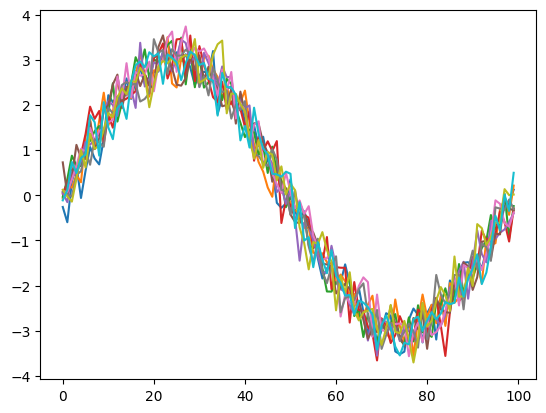

In [369]:
plt.plot(X.T)
plt.show()

In [370]:
X_mean = np.mean(X, axis=0)
X_cent = X - X_mean

In [371]:
X.shape

(10, 100)

# Method I

In [372]:
#Cov = X_cent.T @ X_cent /(N-1)
Cov = np.cov(X, rowvar=False)

In [ ]:
eigenvalues, eigenvectors = np.linalg.eigh(Cov)
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real

In [ ]:
# order from highest to lowest
order_of_importance = np.argsort(eigenvalues)[::-1]
# utilize the sort order to sort eigenvalues and eigenvectors
sorted_eigenvalues = eigenvalues[order_of_importance]
sorted_eigenvectors = eigenvectors[:,order_of_importance] # sort the columns

In [375]:
k = 5

In [376]:
Z = X_cent @ sorted_eigenvectors[:, :k]

In [377]:
X_cent_hat = Z @ sorted_eigenvectors[:, :k].T

In [378]:
print("Mean Square Error ", np.mean(np.square(X_cent_hat - X_cent)))

Mean Square Error  0.02967921929793403


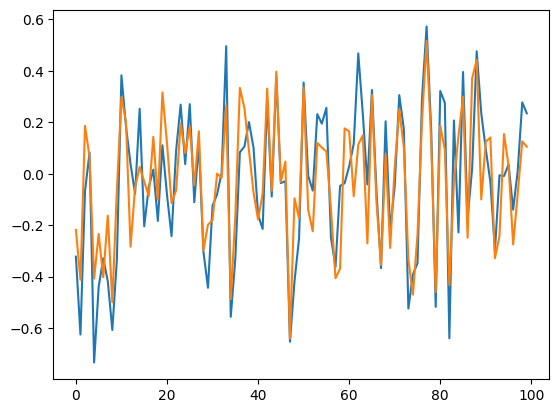

In [379]:
plt.plot(X_cent[0].T)
plt.plot(X_cent_hat[0].T)
plt.show()

In [380]:
# use sorted_eigenvalues to ensure the explained variances correspond to the eigenvectors
print("Explained variance: ", np.sum(sorted_eigenvalues[:k]/np.sum(sorted_eigenvalues)))

Explained variance:  0.677455035403396


# Method II

In [381]:
U, s, Vt = np.linalg.svd(X_cent, full_matrices=False)
S = np.diag(s)
S.shape

(10, 10)

In [382]:
print(S.shape, Vt.T.shape)

(10, 10) (100, 10)


In [383]:
Z = X_cent @ Vt.T[:, :k]

In [384]:
Z.shape

(10, 5)

In [385]:
X_cent_hat = Z @ Vt[:k]

In [386]:
X_cent_hat.shape

(10, 100)

In [387]:
print("Mean Square Error ", np.mean(np.square(X_cent_hat - X_cent)))

Mean Square Error  0.02967921929793403


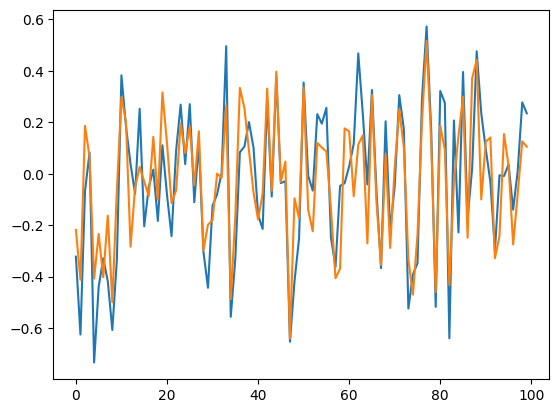

In [388]:
plt.plot(X_cent[0].T)
plt.plot(X_cent_hat[0].T)
plt.show()

In [389]:
Vt.T[:, :k] - Vt[:k, :].T

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0.